# Linear Regression

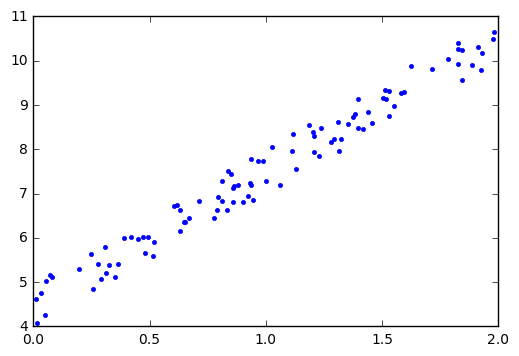

In [25]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)
plt.plot(X,y,".")
plt.show()

In [2]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.48825922],
       [ 2.99296262]])

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.48825922],
       [ 10.47418447]])

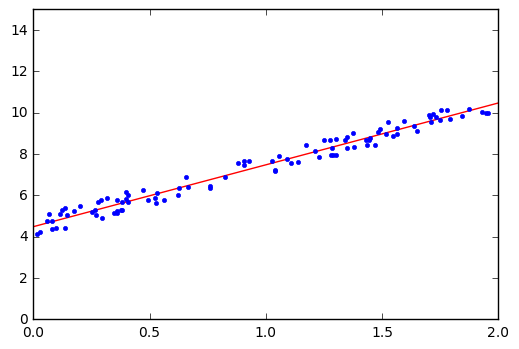

In [4]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[  4.48825922],
       [ 10.47418447]])

In [6]:
lin_reg.intercept_, lin_reg.coef_

(array([ 4.48825922]), array([[ 2.99296262]]))

# Gradient Descent

In [7]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [8]:
theta

array([[ 4.48825922],
       [ 2.99296262]])

In [9]:
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[ 4.48226347],
       [ 3.00133629]])

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.50033776]), array([ 3.00639242]))

# Polynomial Regression

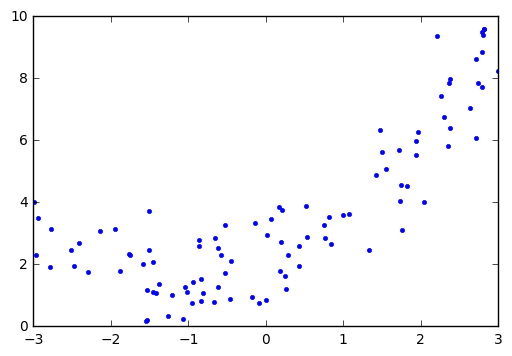

In [29]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
plt.plot(X,y,"b.")
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [14]:
X_poly[:5,:]

array([[-1.65977335,  2.75484758],
       [ 0.99552234,  0.99106474],
       [-1.32844019,  1.76475334],
       [-2.22465309,  4.94908136],
       [ 0.81826133,  0.66955161]])

In [15]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lin_reg.intercept_, lin_reg.coef_

(array([ 2.03204288]), array([[ 1.02456855,  0.45895181]]))

In [17]:
X_new = np.linspace(-3,3,100)
y_predict = lin_reg.coef_[0][1] * X_new ** 2 + lin_reg.coef_[0][0] * X_new + lin_reg.intercept_

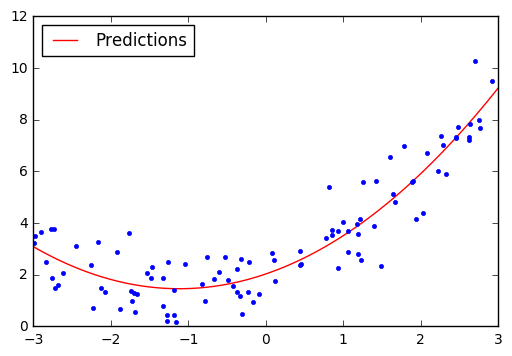

In [18]:
plt.plot(X_new, y_predict, "r-",label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left")
plt.show()

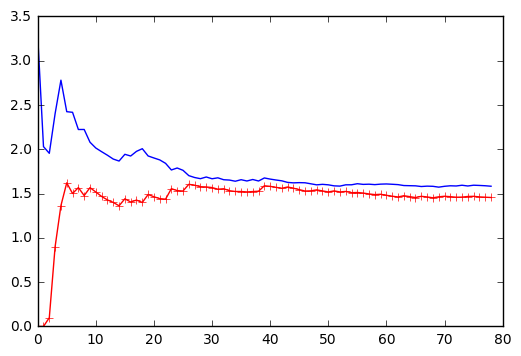

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", label="train")
    plt.plot(np.sqrt(val_errors), "b-", label="val")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()

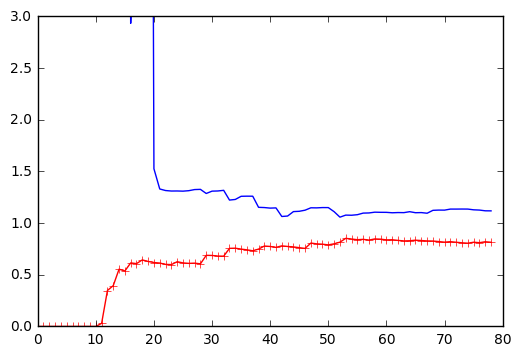

In [21]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

# Regularized Linear Models

## Ridge Regression

- 正则项只在训练时的代价函数中添加
- 对于大部分带正则的模型，输入标准化很重要

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 8.96600819]])

In [28]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 8.86119522])

## Lasso Regression

- Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).
- 次梯度

In [35]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([ 5.1070652])

In [34]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 4.38078103])

## Elastic Net

- a middle ground between Ridge Regression and Lasso Regression
- Ridge is a good default;
- Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [36]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([ 5.10413094])

## Early Stopping

In [47]:
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimun_val_error = float("inf")
X_train_poly_scaled, X_val_poly_scaled, y_train, y_val = train_test_split(X_poly, y, test_size=0.2)
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimun_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [48]:
best_model

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)

# Logistic Regression

## Estimating Probabilities

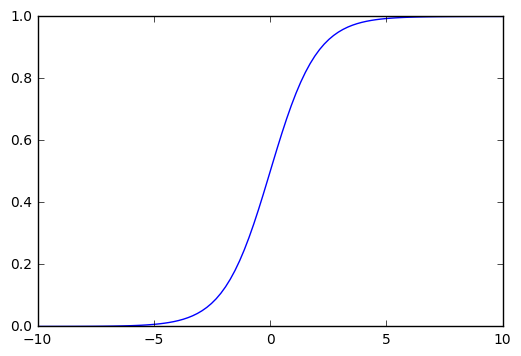

In [77]:
xi = np.linspace(-10,10,100)
yi = 1 / (1 + np.exp(-xi))
plt.plot(xi, yi)
plt.show()

## Training and Cost Function
## Decision Boundaries

In [78]:
from sklearn import datasets
iris = datasets.load_iris()

In [79]:
list(iris.keys())

['DESCR', 'target', 'feature_names', 'target_names', 'data']

In [113]:
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)
X

array([[ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.4],
       [ 0.3],
       [ 0.2],
       [ 0.2],
       [ 0.1],
       [ 0.2],
       [ 0.2],
       [ 0.1],
       [ 0.1],
       [ 0.2],
       [ 0.4],
       [ 0.4],
       [ 0.3],
       [ 0.3],
       [ 0.3],
       [ 0.2],
       [ 0.4],
       [ 0.2],
       [ 0.5],
       [ 0.2],
       [ 0.2],
       [ 0.4],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.4],
       [ 0.1],
       [ 0.2],
       [ 0.1],
       [ 0.2],
       [ 0.2],
       [ 0.1],
       [ 0.2],
       [ 0.2],
       [ 0.3],
       [ 0.3],
       [ 0.2],
       [ 0.6],
       [ 0.4],
       [ 0.3],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 1.4],
       [ 1.5],
       [ 1.5],
       [ 1.3],
       [ 1.5],
       [ 1.3],
       [ 1.6],
       [ 1. ],
       [ 1.3],
       [ 1.4],
       [ 1. ],
       [ 1.5],
       [ 1. ],
       [ 1.4],
       [ 1.3],
       [ 1.4],
       [ 1

In [105]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

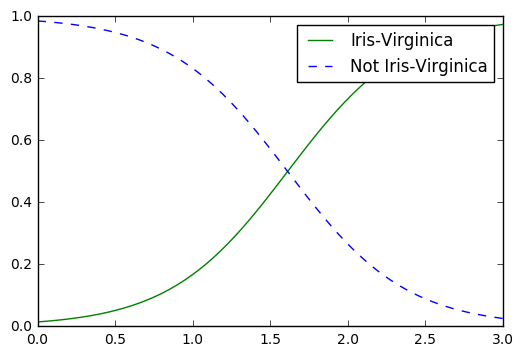

In [92]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.show()

In [93]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## Softmax Regression

In [121]:
X = iris["data"][:,(2,3)]
y = iris["target"]

In [109]:
X

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.7,  0.4],
       [ 1.4,  0.3],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.5,  0.2],
       [ 1.6,  0.2],
       [ 1.4,  0.1],
       [ 1.1,  0.1],
       [ 1.2,  0.2],
       [ 1.5,  0.4],
       [ 1.3,  0.4],
       [ 1.4,  0.3],
       [ 1.7,  0.3],
       [ 1.5,  0.3],
       [ 1.7,  0.2],
       [ 1.5,  0.4],
       [ 1. ,  0.2],
       [ 1.7,  0.5],
       [ 1.9,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.4],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.6,  0.2],
       [ 1.6,  0.2],
       [ 1.5,  0.4],
       [ 1.5,  0.1],
       [ 1.4,  0.2],
       [ 1.5,  0.1],
       [ 1.2,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.1],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.3,  0.3],
       [ 1.3,  0.3],
       [ 1.3,  0.2],
       [ 1.6,  0.6],
       [ 1.9,  0.4],
       [ 1.4,  0.3],
       [ 1.6,  0.2],
       [ 1.4,

In [122]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])

In [124]:
softmax_reg.predict([[5, 2]])

array([2])